# TP2: Classification non supervisée (clustering)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import namedtuple

## K-means

In [19]:
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import sklearn.metrics as metrics

## KMeans sur un dataset synthétique
Créez un dataset synthétique à partir de [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) 300 échantillons, 4 centres, un écart type de 0.6 et une graine du générateur aléatoire (*random_state*) à 0.
Affichez le à l'aide de la fonction [scatter de matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

(300, 2)
(300,)
[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]


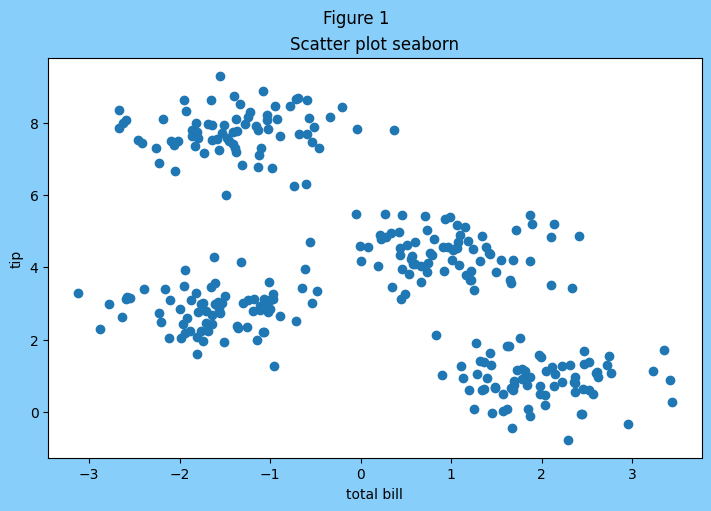

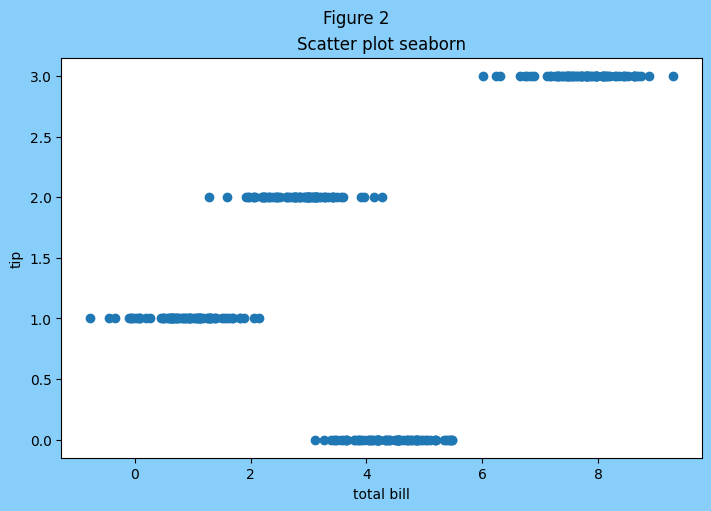

In [20]:
X, y = datasets.make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, center_box=(-10.0, 10.0), shuffle=True, random_state=0, return_centers=False)
print(X.shape)
print(y.shape)
print(X[:5])
x_samples0 = [item[0] for item in X]
x_samples1 = [item[1] for item in X]
fig1, ax1 = plt.subplots(figsize=(7, 5), facecolor='lightskyblue',
                       layout='constrained')
fig1.suptitle('Figure 1')
plt.scatter(x_samples0, x_samples1)
plt.ylabel('tip')
plt.xlabel('total bill')
plt.title('Scatter plot seaborn')
plt.show()

fig2, ax2 = plt.subplots(figsize=(7, 5), facecolor='lightskyblue',
                       layout='constrained')
fig2.suptitle('Figure 2')
plt.scatter(x_samples1, y)
plt.ylabel('tip')
plt.xlabel('total bill')
plt.title('Scatter plot seaborn')
plt.show()

Il est relativement facile de repérer les quatre clusters. L'algorithme [k-means de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) va le faire automatiquement. Utilisez-le en précisant de chercher 4 clusters dans les paramètres du KMeans.
Stockez dans une variable le resultat de la fonction [*predict*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) qui va renvoyer l'indice du cluster à laquelle appartient chaque échantillon.

In [21]:
K = KMeans(n_clusters=4, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd').fit(X)
K_prediction = K.predict(X)

Visualisons les résultats en traçant les données en fonction de leur numéro de cluster toujours avec *scatter* (précisez 'viridis' en cmap). Nous allons également tracer en noir les centres des clusters tels que déterminés par l'estimateur k-means (attribut *cluster_centers_* de l'instance de kmeans sur laquelle vous travaillez).

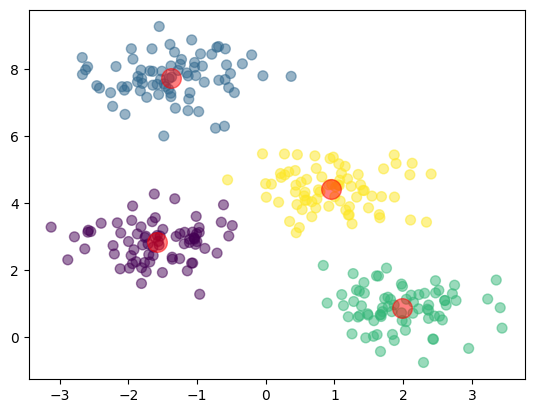

In [22]:
plt.scatter(x_samples0, x_samples1, cmap='viridis', c=K_prediction, s=50, alpha=0.5)
plt.scatter(K.cluster_centers_[:, 0], K.cluster_centers_[:, 1], s=200, c='red', alpha=0.5)
plt.show()


## KMeans sur le jeu de données Iris
Utilisation d'un jeu de données "réel", [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris). Chargez le jeu de données dans une variable *iris* et affichez les données.

In [23]:
iris = datasets.load_iris(return_X_y=False, as_frame=False)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
#affichage des données, vous permet de mieux comprendre le jeu de données (optionnel)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Stocker les données et les cibles (*target*) dans des DataFrames panda (en précisant les noms de colonnes de données)

In [25]:
#Stocker les données en tant que DataFrame Pandas
iris_panda = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_panda['target'] = iris.target
print(iris_panda)
target = pd.DataFrame(iris.target, columns=['target'])
target
# iris_panda['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# iris_panda.head()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Utiliser la fonction KMeans de sklearn sur ce jeu de données avec 3 clusters

In [ ]:
#Cluster K-means
iris_excluding_target = iris_panda.loc[:, iris_panda.columns.difference(['target'])]

K_iris = KMeans(n_clusters=3, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd').fit(iris_excluding_target)
K_prediction_iris = K_iris.predict(iris_excluding_target)
print('K_iris')
print(K_iris)
print('/n')
print('K_prediction_iris')
print(K_prediction_iris)
print('/n')
print('iris_panda.loc[:, iris_panda.columns.difference([target])]')
print(iris_panda.loc[:, iris_panda.columns.difference(['target'])])

iris_excluding_target
[[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
  1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
  1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
  4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
  5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
  4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
  5.7 5.2 5.  5.2 5.4 5.1]
 [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

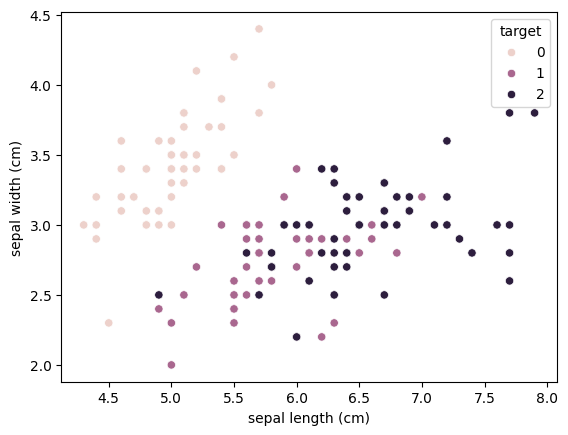

In [27]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=iris_panda)

Affichez le résultat du clustering en couleur à l'aide de *[scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)* de seaborn, rouge pour le cluster 0, vert pour le 1 et bleu pour le 2. Utilisez dans un premier temps la longeur des pétales en X et la largueur des pétales en Y. Changez la forme des points en fonction du type d'iris *iris.target* et *iris.target_names*. Est-ce que tous les iris sont dans le bon groupe ?

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

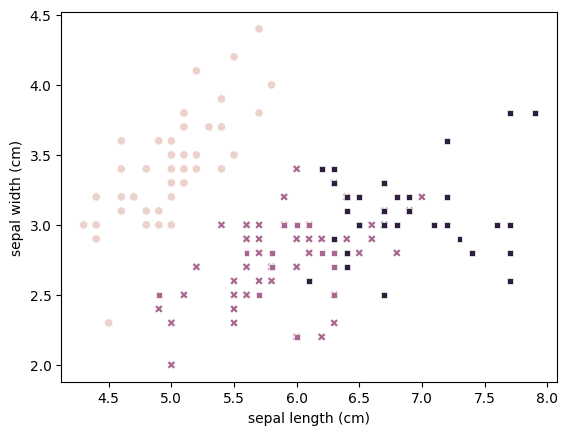

In [28]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)

A l'aide de *[subplot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)* affichez les différentes combinaisons possibles de choix de 2 axes parmis les 4 possibles pour choisir le meilleur couple.

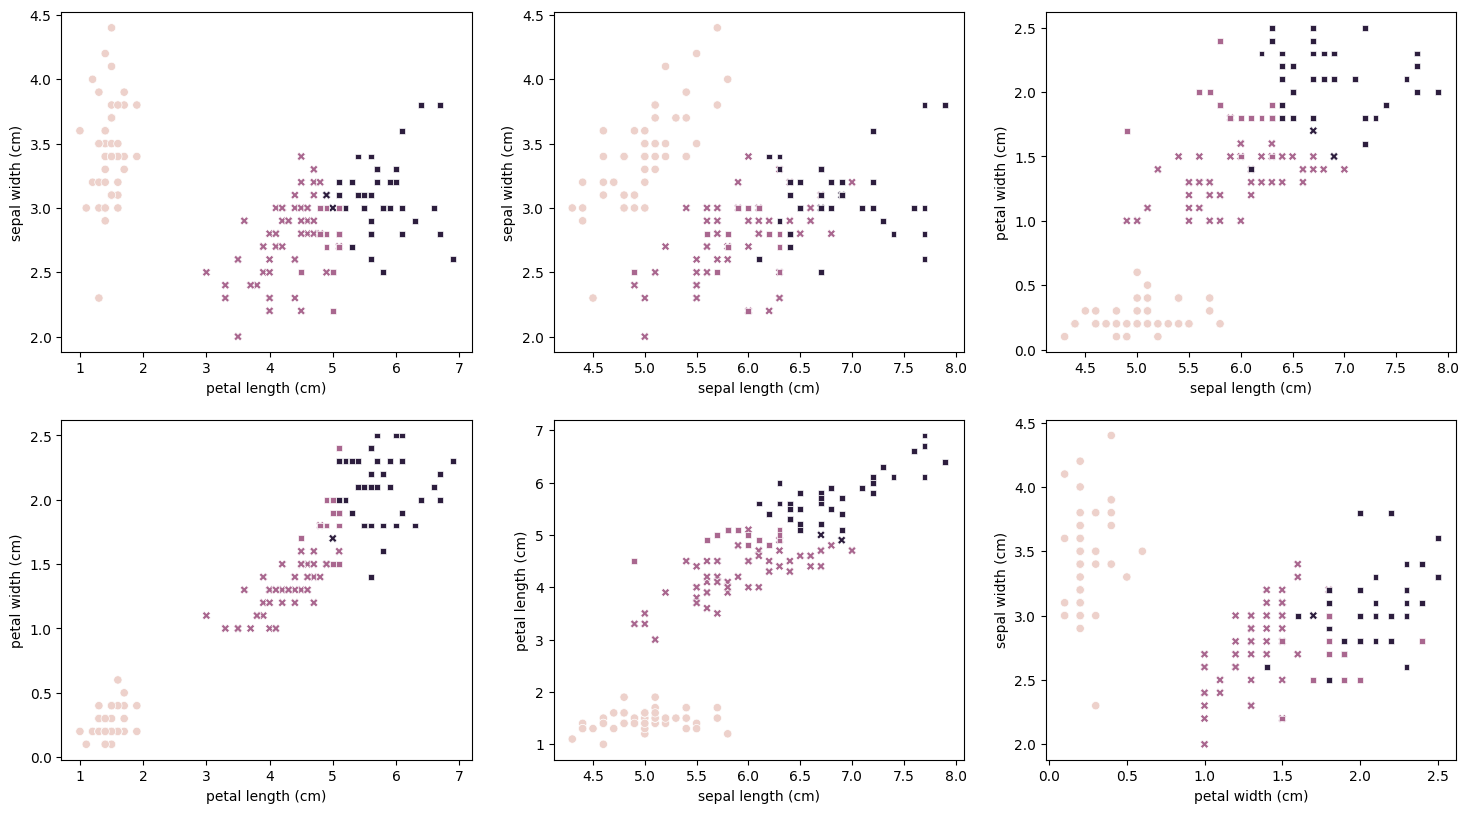

In [29]:
fig = plt.figure(figsize=(18, 15))
plt.subplot(3, 3, 1)
sns.scatterplot(x='petal length (cm)', y='sepal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.subplot(3, 3, 2)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.subplot(3, 3, 3)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.subplot(3, 3, 4)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.subplot(3, 3, 5)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.subplot(3, 3, 6)
sns.scatterplot(x='petal width (cm)', y='sepal width (cm)', hue=K_prediction_iris,style='target', legend=False, data=iris_panda)
plt.show()



## Qualité du kMeans

Nous avons affiché les éléments mal classifiés, nous pouvons maintenant vérifier la précision de notre classification non supervisée avec *[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)*

In [30]:
metrics.accuracy_score(y_true = target, y_pred = K_prediction_iris, normalize=True, sample_weight=None)

0.8933333333333333

Affichons la matrice de confusion *[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)* qui va nous permettre d'évaluer la précision de la classification par classe.

In [31]:
metrics.confusion_matrix(y_true = target, y_pred = K_prediction_iris, labels=None, sample_weight=None, normalize=None)
# Si la matrice n'a pas les plus gros facteurs sur la diagonale, il faut intervertir les labels (ou les colonnes)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

## Codage de son propre kmeans
Coder votre propre kmeans et comparez les résultats de votre code avec la classification précédente.

In [88]:
#codage du k-means
def lloyds_algorithm(X, number_of_urns = 4, max_iter = 100, initial_partitioning = None):
    if isinstance(X, pd.DataFrame):
        print('X is pd.DataFrame')
        X = X.to_numpy()

    #Initialisation des centroïdes
    if initial_partitioning is None:
        print('initial_partitioning is None')
        print(X.shape[0])
        if X.shape[0] < number_of_urns:
            raise ValueError("The number of urns should be less than the number of samples")
        centroids = X[np.random.choice(range(X.shape[0]), number_of_urns, replace=False)]
    else:
        centroids = np.array([X[initial_partitioning == i].mean(axis=0) for i in range(number_of_urns)])
    
    for i in range(max_iter):
        print(i)
        #Calcul des distances
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        #Assignation des clusters
        clusters = np.argmin(distances, axis=0)
        #Calcul des nouveaux centroïdes
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(number_of_urns)])
        #Vérification de la convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    # K_mean = namedtuple("clusters", "centroids")
    # issubclass(K_mean, tuple)
    # K = K_mean(clusters, centroids)
    return (clusters, centroids)

initial_partitioning is None
300
0
1
2
3
4
5


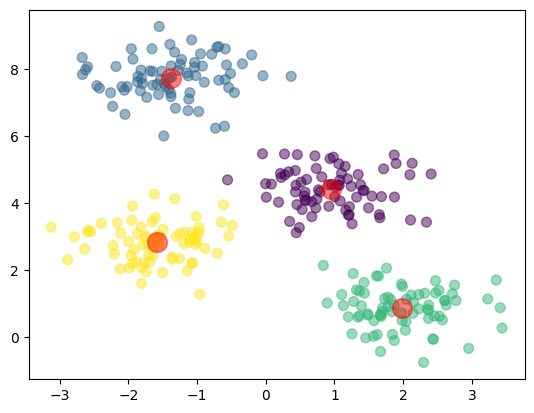

(array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3]),

In [89]:
# test sur les données synthétiques
K_test = lloyds_algorithm(X, number_of_urns=4, max_iter=300)
plt.scatter(x_samples0, x_samples1, cmap='viridis',c=K_test[0], s=50, alpha=0.5)
plt.scatter(K_test[1][:, 0], K_test[1][:, 1], s=200, c='red', alpha=0.5)
plt.show()
print(K_test)


X is pd.DataFrame
initial_partitioning is None
150
0
1
2
3
4
5
6
7
8


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

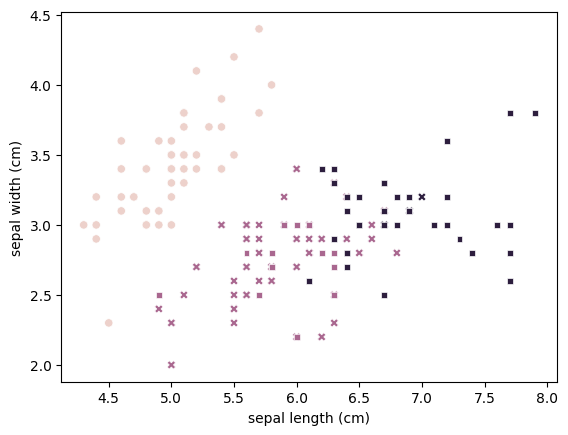

In [99]:
# test sur iris
K_test_iris = lloyds_algorithm(iris_excluding_target, number_of_urns=3, max_iter=300)
# Ensure you are using the correct column names
# plt.scatter(x_samples0, x_samples1, cmap='viridis',c=K_test[0], s=50, alpha=0.5)
# plt.scatter(K_test[1][:, 0], K_test[1][:, 1], s=200, c='red', alpha=0.5)
# plt.show()
# print(K_test_iris)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=K_test_iris[0],style='target', legend=False, data=iris_panda)

## Obtention du meilleur nombre de clusters
Déterminer le nombre optimal de clusters dans un ensemble de données est une question fondamentale dans le clustering par partitionnement, tel que le clustering k-means, qui nécessite que l'utilisateur spécifie le nombre de clusters k à générer. Le nombre optimal de clusters dépend de la méthode utilisée pour mesurer les similarités et des paramètres utilisés pour le partitionnement.
les méthodes directes consistent à optimiser un critère, tel que les sommes de carrés à l'intérieur d'un cluster ou la silhouette moyenne. Les méthodes correspondantes sont appelées respectivement méthodes du coude *elbow* et de la silhouette moyenne.


### Méthode *elbow*

Rappelons que l'idée de base des méthodes de partitionnement, telles que le clustering k-means, est de définir des clusters de telle sorte que l'inertie totale soit minimisée. L'inertie est calculée comme la somme des carrés des distances des échantillons à leur centre de cluster le plus proche.

La méthode Elbow considère l'inertie comme une fonction du nombre de clusters : Il faut choisir un nombre de clusters tel que l'ajout d'un autre cluster n'améliore pas beaucoup plus l'inertie total.

Le nombre optimal de clusters peut être défini comme suit :

- Effectuer le kmeans pour différentes valeurs de k. Par exemple, en faisant varier k de 1 à 10 clusters.
- Pour chaque k, calculer l'inertie totale (donnée comme un [attribut](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de l'instance de kmeans manipulée).
- Tracez la courbe de l'inertie en fonction du nombre de clusters k.
- L'emplacement d'un point d'inflexion dans le tracé est généralement considéré comme un indicateur du nombre approprié de clusters.

Tracez cette courbe pour les iris (K de 1 à 10).

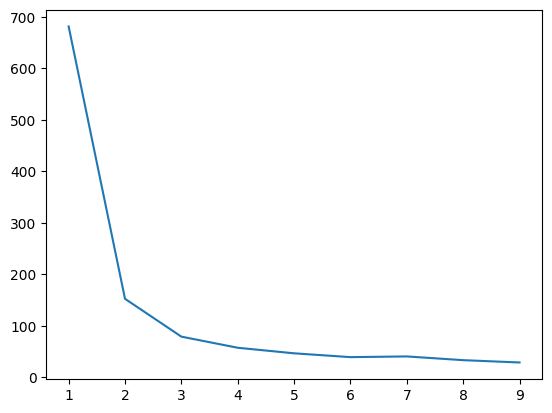

In [105]:
liste_K_iris = []
liste_inertie = []
for index_K in range(1,10):
    liste_K_iris.append(KMeans(n_clusters=index_K, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd').fit(iris_excluding_target))
    liste_inertie.append(liste_K_iris[index_K-1].inertia_)
plt.plot(range(1,10), liste_inertie)


### Méthode de la [silhouette moyenne](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.
La méthode de la silhouette moyenne calcule la silhouette moyenne des observations pour différentes valeurs de k. Le nombre optimal de clusters k est celui qui maximise la silhouette moyenne sur une gamme de valeurs possibles pour k.

L'algorithme est similaire à la méthode *elbow* et peut être calculé comme suit :

- Effectuer le kmeans pour différentes valeurs de k. Par exemple, en faisant varier k de 2 à 10 clusters.
- Pour chaque k, calculer la silhouette moyenne des observations (avg.sil).
- Tracez la courbe de avg.sil en fonction du nombre de clusters k.
- L'emplacement du maximum est considéré comme le nombre approprié de clusters.

De même que précédement, appliquez cette méthode sur les iris.

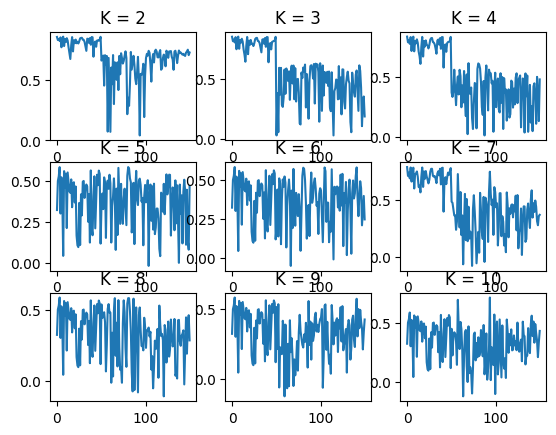

In [135]:
liste_K_iris2 = []
liste_prediction = []
liste_silhouette = []
# plt.subplot(figsize=(15, 15))
for index_K in range(2,11):
    liste_K_iris2.append(KMeans(n_clusters=index_K, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd').fit(iris_excluding_target))
    liste_prediction.append(liste_K_iris2[index_K-2].predict(iris_excluding_target))

    liste_silhouette.append(metrics.silhouette_samples(iris_excluding_target, liste_prediction[index_K-2]).mean())
    plt.subplot(3, 3, index_K-1)
    plt.plot(metrics.silhouette_samples(iris_excluding_target, liste_prediction[index_K-2]))
    plt.title('K = {}'.format(index_K))


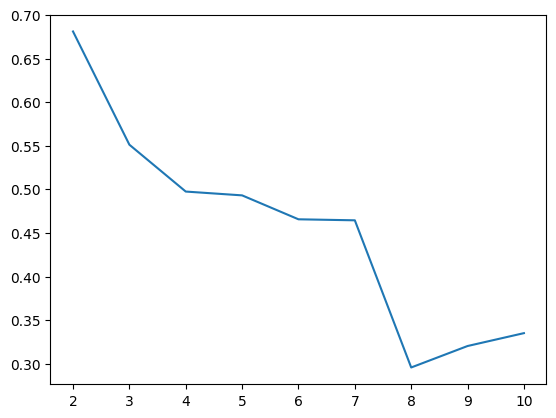

In [133]:
plt.plot(range(2,11), liste_silhouette)

## Classification Ascendante Hiérarchique (CAH)

Chargez et affichez le jeu de données `zoo`. Que contient ce dataset ?

Combien y a-t-il d'espèces différentes ? Affichez leur nom

Extrayez les features dans une matrice `numpy`, puis normalisez les données à l'aide de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

### CAH

Notre objectif est de créer une classification des espèces en utilisant seulement les caractéristiques de chaque animal (i.e. toutes les colonnes sauf `type` et `name`). Ces classifications se présentent souvent sous la forme d'arbres, d'où le choix de la CAH. On pourra ensuite comparer notre classification à celle donnée dans le dataset.

Nous utiliserons la classe [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) de scikit-learn. Dans un premier temps, utilisez `distance_threshold=0` pour calculer tout l'arbre. On choisira ensuite le nombre de clusters qui nous intéresse.

### Visualisation du clustering avec un dendrogramme

Utilisez la fonction `plot_dendrogram` pour représenter votre CAH. Pour les labels, utilisez ceux présents dans le dataset `zoo` pour comparer le votre classification à la classification scientifique des espèces. Essayez plusieurs valeurs de `n_clusters` et comparer les classifications. Vous pourrez utiliser la fonction `savefig` de matplotlib pour sauvegarder le dendrogramme et zoomer dans l'image.

In [35]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, labels=None, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    if labels is not None:
        assert len(labels) == len(model.children_) + 1
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=labels, **kwargs)

NameError: name 'agg' is not defined

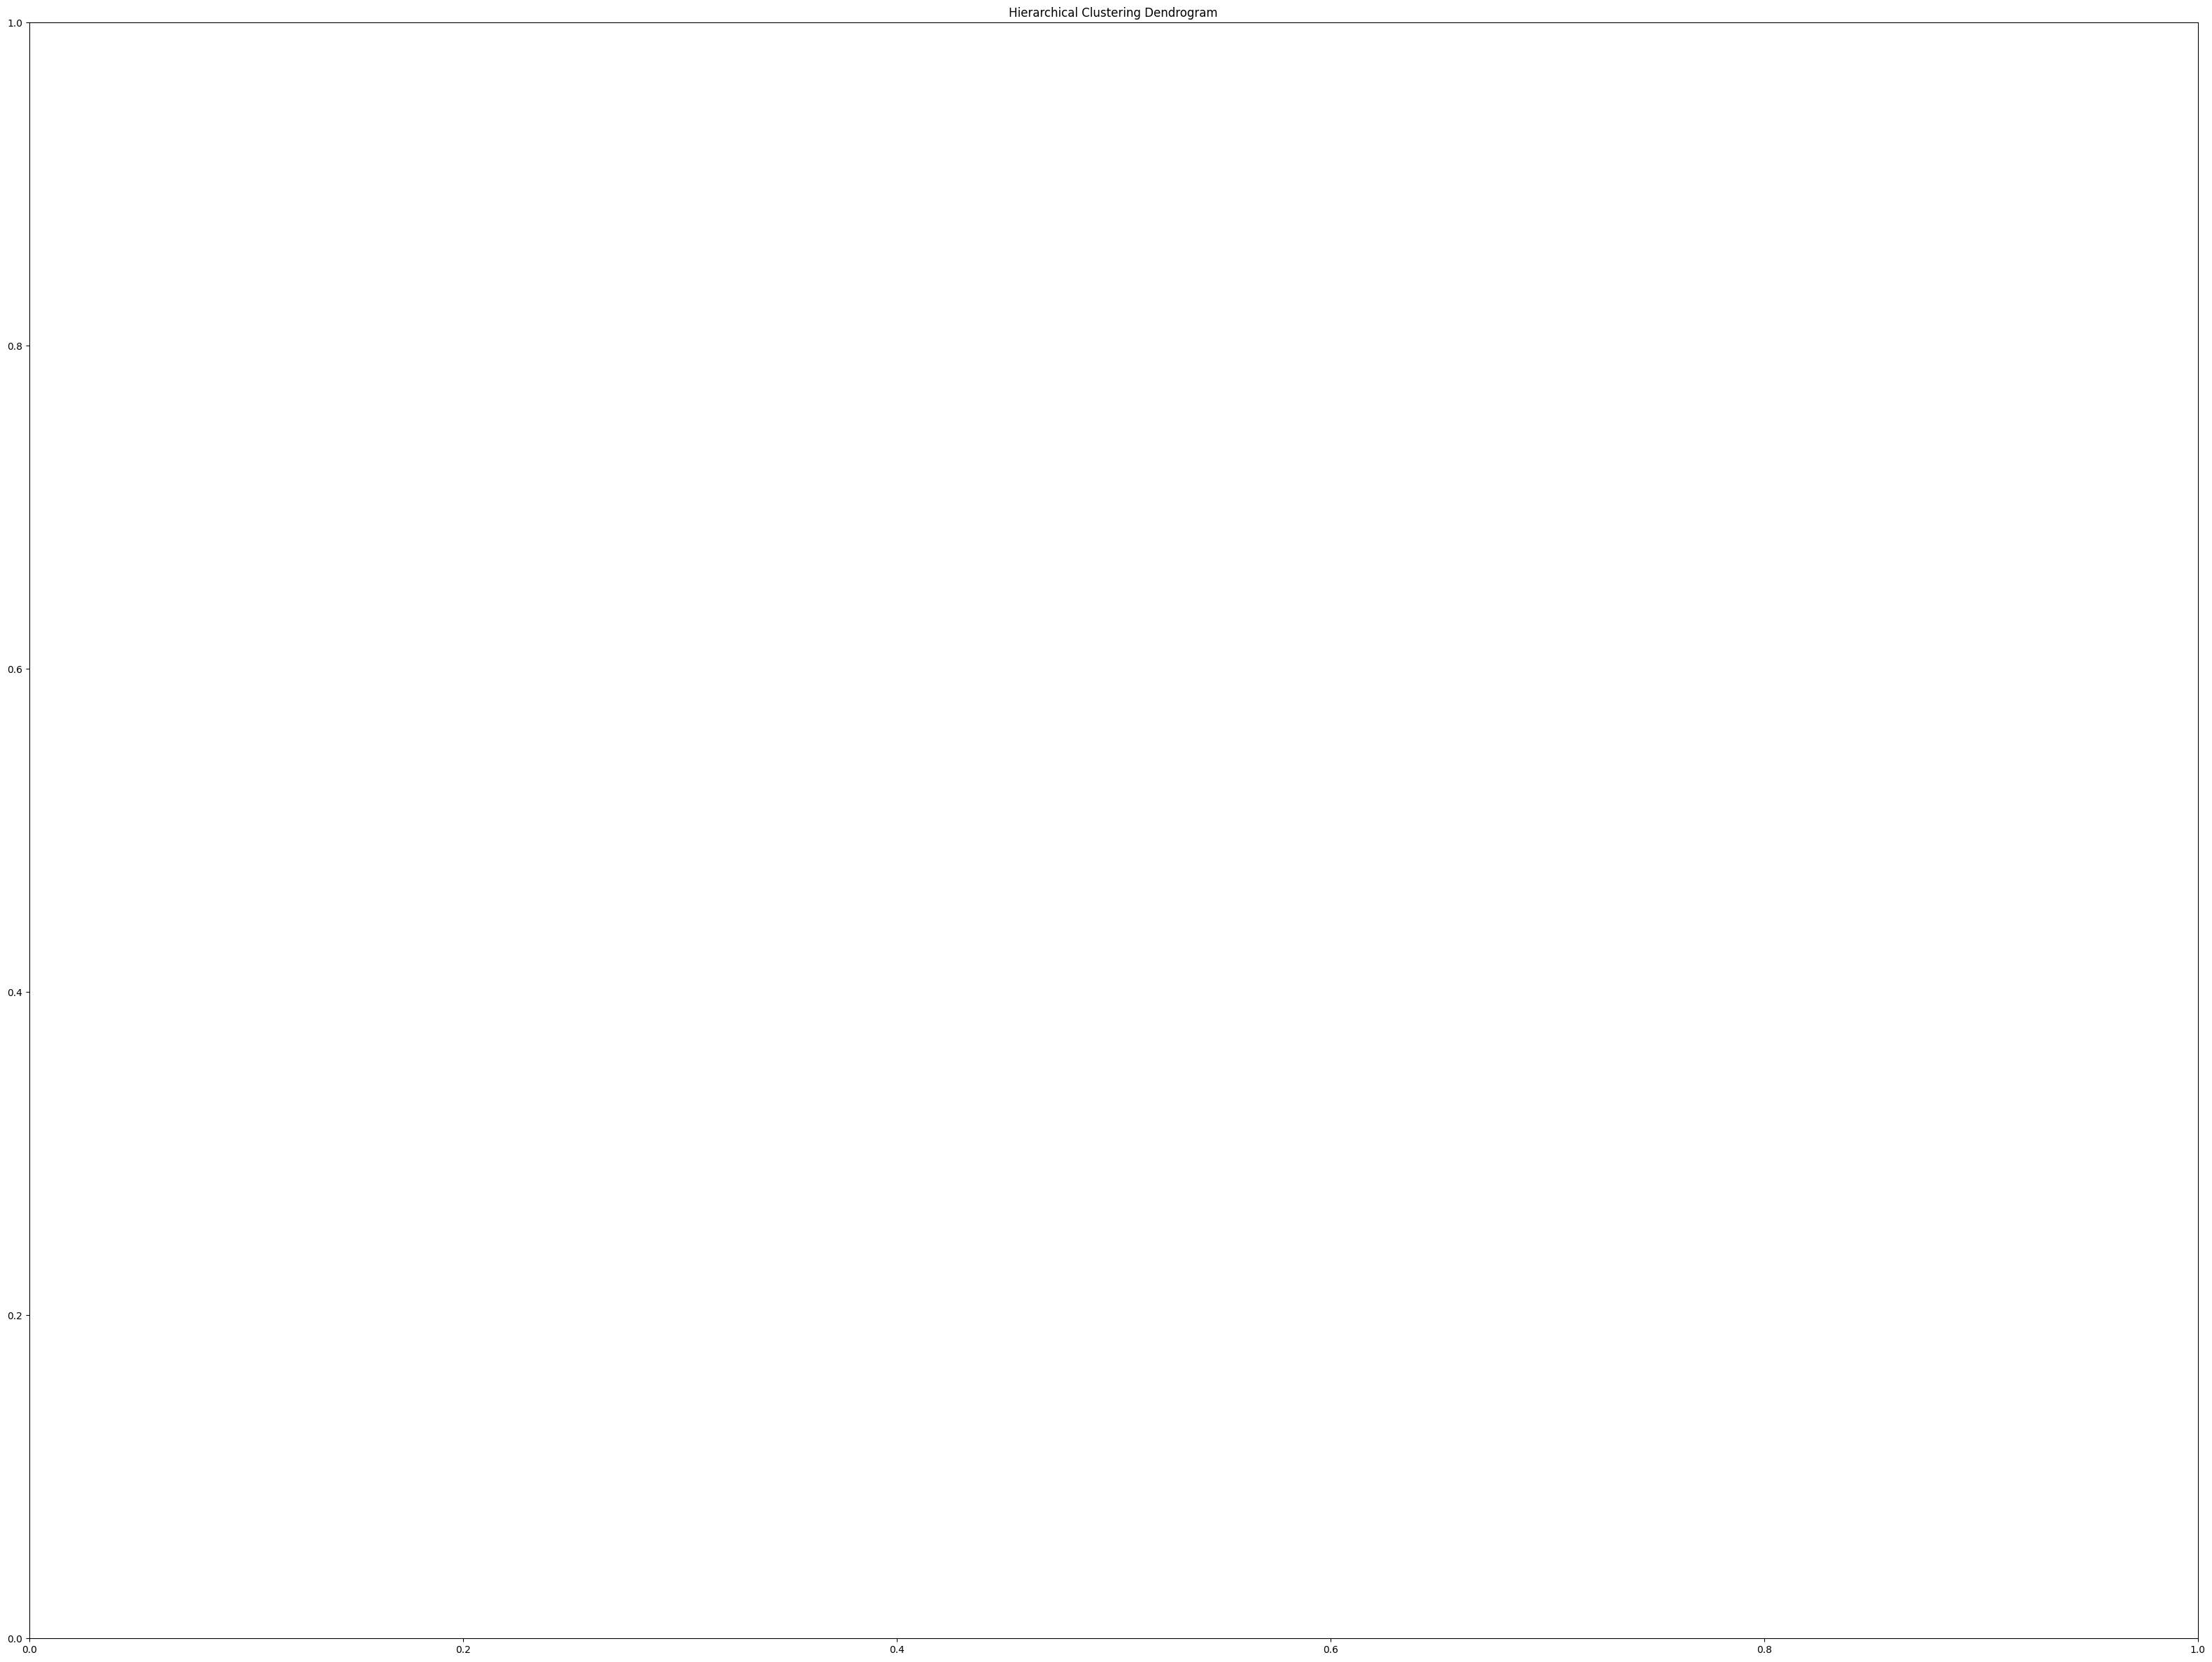

In [36]:
# agg = your CAH model
fig, ax = plt.subplots(figsize=(40, 30))
plt.title("Hierarchical Clustering Dendrogram")
n_clusters = 4
thresh = agg.distances_[::-1][n_clusters-2:n_clusters].mean()
labels = zoo[['name', 'type']].apply(lambda r: r[0] + ' / ' + r[1], axis=1).to_numpy()
plot_dendrogram(agg, labels=labels, orientation='right', color_threshold=thresh)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.savefig('dendrogram.png', dpi=400)
plt.show()

### Choix du nombre de clusters

Affichez un barplot des gains d'inertie (les hauteurs dans le dendrogramme). Ils se trouvent dans l'attribut [distances_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) d'`AgglomerativeClustering`.

A partir de ce graphique, déterminez un nombre raisonnable de clusters.

Calculez les métriques [Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) et [Davies-Bouldin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) pour plusieurs valeurs de `n_clusters`. 

Plus d'information sur ces métriques dans le Guide de l'Utiliateur de scikit-learn:
- silhouette: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
- davies-bouldin: https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

Choisissez un nombre de clusters à l'aide de ces métriques.

Visualisez à nouveau le dendrogramme avec le(s) nombre(s) de clusters que vous avez choisi et comparez à la classification scientifique des espèces.

### Comparaison de linkages

Refaite un clustering hiérarchique avec `linkage=single`. Affichez le dendrogramme complet et comparez avec le dendrogramme obtenu précédemment avec le linkage par défaut (`ward`).

La cellule suivante crée plusieurs jeux de données 2D. Effectuez un clustering de chacun de ces jeux de données pour les 4 linkage disponibles (voir la doc d'`AgglomerativeClustering`), avec le bon nombre de clusters (celui utilisé pour générer le jeu de données) pour se placer dans un cas favorable. N'oubliez pas de standardiser les données ! Affichez les clusterings sur une mosaïque ainsi que la "vraie" classification en colorant les points et comparez les résultats. Quelle remarque pouvez-vous faire sur la taille des clusters pour le linkage "single" ?

In [ ]:
from sklearn import cluster, datasets

# Génération de plusieurs datasets
np.random.seed(0)
n_samples = 1500

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# pas de "clusters" pour no_structure, on les met tous dans la même catégorie pour la visualisation
no_structure = np.random.rand(n_samples, 2), np.zeros(n_samples, dtype=np.uint8)

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)



# Tous les datasets: liste de tuples (dataset, n_clusters). 
# Un dataset est un couple (X, labels) avec X: matrice de features, y: "vrai" labels (sauf pour no_structure)
data = [
    (noisy_circles, 2),
    (noisy_moons, 2),
    (varied, 3),
    (aniso, 3),
    (blobs, 3),
    (no_structure, 3),  # pas de ground truth ici, mais on va chercher 3 clusters
]

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=len(data), ncols=5)
fig.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

colors = np.array(['blue', 'red', 'green'])
linkages = ['single', 'average', 'complete', 'ward']

def draw_clustering(X, labels, ax, title=None):
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels], s=10)
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None:
        ax.set_title(title)

for i, (dataset, n_clusters) in enumerate(data):
    X, labels = dataset
    
    # Plot ground truth
    title = 'ground truth' if i==0 else None
    draw_clustering(X, labels, axes[i, 0], title=title)
    
    # Cluster with single, average, complete and ward linkage and plot
    for j, linkage in enumerate(linkages):
        # TODO

Single linkage a tendance à créer de très gros clusters et d'autres quasi vides (rich get richer), ce qu'on remarque aussi sur `zoo`.

## Comparaison de clusterings

Il existe des métriques pour comparer des clusterings entre eux. Nous allons utiliser l'ARI https://en.wikipedia.org/wiki/Rand_index.

In [ ]:
from sklearn.metrics import adjusted_rand_score

Comme nous disposons des labels pour le jeu de donnée `zoo`, affichez l'ARI entre un clustering CAH et la ground truth, en faisant varier le nombre de clusters. Faites de même avec un k-means.

Comparez maintenant les deux méthodes de clustering entre elles. Les clusterings obtenus sont-ils similaires ?

Les scores sont assez élevés, les deux méthodes ont l'air de fournir des clusterings assez similaires sur ce jeu de données.

## Mini batch kmeans

Implémentez une fonction mini-batch kmeans. L'algorithme est disponible dans cet article (*Algorithm 1*) https://web.archive.org/web/20150225224202id_/http://www.eecs.tufts.edu:80/~dsculley/papers/fastkmeans.pdf.

Comparer les clustering obtenus par vos deux fonctions kmeans et mini batch kmeans, pour une même initialisation. On pourra appliquer ces deux fonctions sur un échantillon de grande taille de données simulées. On pourra lancer plusieurs fois l’algorithme et dresser le boxplot de l’ARI entre les deux clusterings. Comparez aussi les temps d'exécution.